<a href="https://colab.research.google.com/github/Guillermo-rv/RNN/blob/main/Copia_de_rnn_melbourne_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


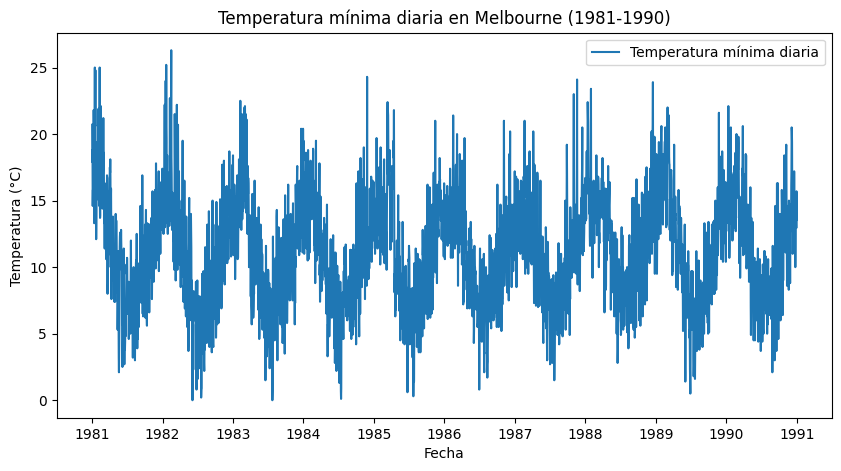

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url, parse_dates=["Date"], index_col="Date")


print(df.head())

plt.figure(figsize=(10,5))
plt.plot(df.index, df["Temp"], label="Temperatura mínima diaria")
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.title("Temperatura mínima diaria en Melbourne (1981-1990)")
plt.legend()
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df["Temp"] = scaler.fit_transform(df[["Temp"]])


def crear_secuencias(data, pasos=10):
    X, y = [], []
    for i in range(len(data) - pasos):
        X.append(data[i:i+pasos])
        y.append(data[i+pasos])
    return np.array(X), np.array(y)

pasos = 10


X, y = crear_secuencias(df["Temp"].values, pasos)

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)


Forma de X_train: (2912, 10, 1)
Forma de y_train: (2912,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, activation='relu', return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0577 - val_loss: 0.0096
Epoch 2/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0115 - val_loss: 0.0098
Epoch 3/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0112 - val_loss: 0.0090
Epoch 4/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0104 - val_loss: 0.0084
Epoch 5/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0098 - val_loss: 0.0079
Epoch 6/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0097 - val_loss: 0.0076
Epoch 7/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0097 - val_loss: 0.0079
Epoch 8/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0093 - val_loss: 0.0076
Epoch 9/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0094 - val_loss: 0.0073
Epoch 10/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0098 - val_loss: 0.0074
Epoch 11/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0090 - val_loss: 0.0073
Epoch 12/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

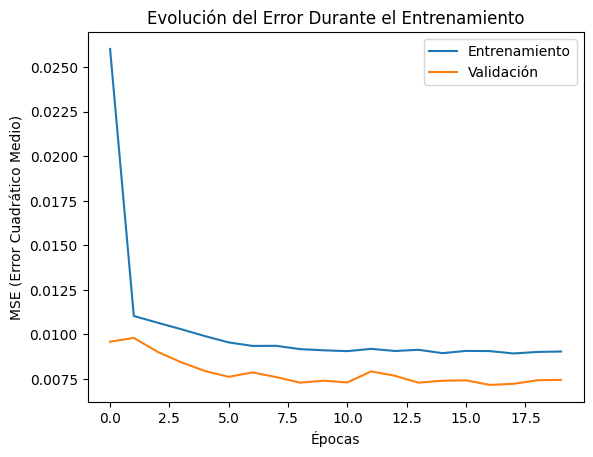

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Entrenamiento")
plt.plot(history.history["val_loss"], label="Validación")
plt.xlabel("Épocas")
plt.ylabel("MSE (Error Cuadrático Medio)")
plt.title("Evolución del Error Durante el Entrenamiento")
plt.legend()
plt.show()


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


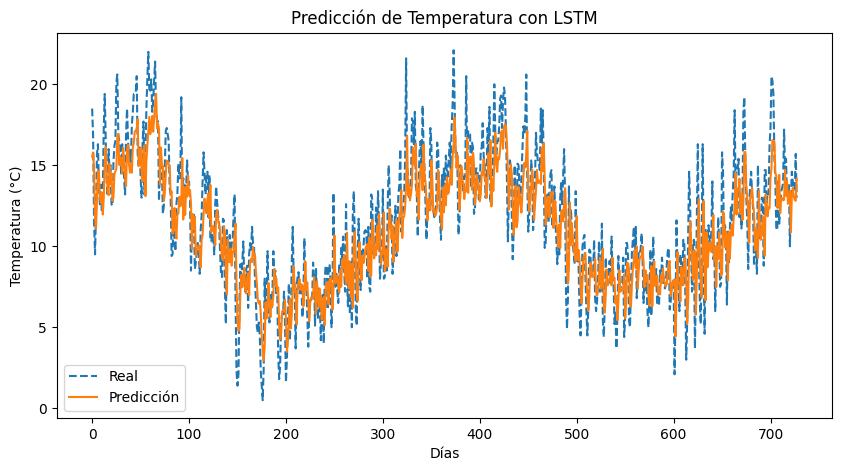

In [ ]:
predicciones = model.predict(X_test)

predicciones = scaler.inverse_transform(predicciones.reshape(-1,1))
y_test_original = scaler.inverse_transform(y_test.reshape(-1,1))

plt.figure(figsize=(10,5))
plt.plot(y_test_original, label="Real", linestyle="dashed")
plt.plot(predicciones, label="Predicción")
plt.xlabel("Días")
plt.ylabel("Temperatura (°C)")
plt.title("Predicción de Temperatura con LSTM")
plt.legend()
plt.show()
